In [3]:
from datasets import load_dataset

In [8]:
emotions = load_dataset("emotion",trust_remote_code=True,cache_dir="../data/external")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [12]:
import pandas as pd 
emotions.set_format(type="pandas") 
df = emotions["train"][:] df.head()

In [23]:
def label_int2str(row):    
    return emotions["train"].features["label"].int2str(row)
    
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


<Axes: xlabel='label_name'>

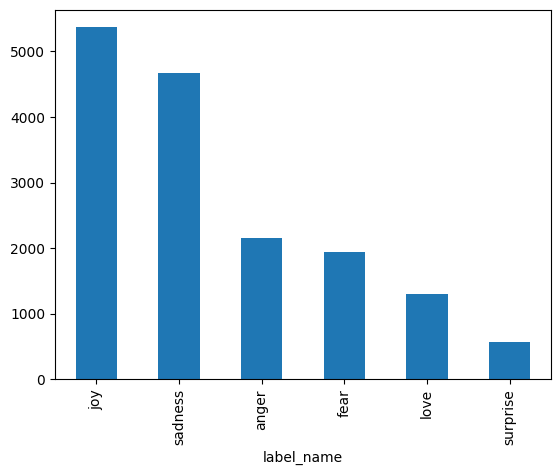

In [29]:
# class distribution
df.label_name.value_counts().plot(kind='bar')

In [30]:
## The classes are highly unbalanced. Let's ignore this for the time being


<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

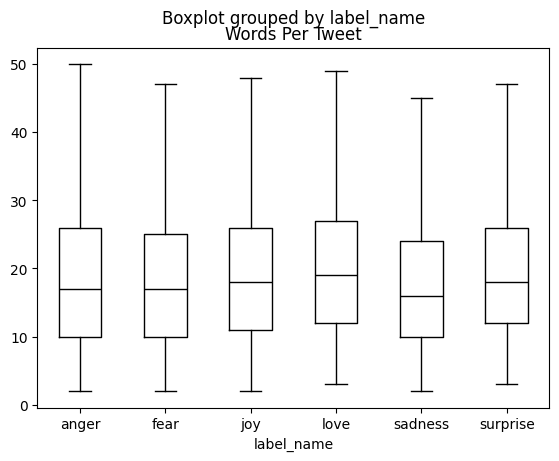

In [33]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")

In [35]:
## Rest the datasets format as we don't need df anymore
emotions.reset_format()